In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import lineplot
import sys
sys.path.append('../scripts')
from preprocess import clean_data, find_columns_with_missing_value
from report import data_quality_report, plot_time_series

In [2]:
data = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
find_columns_with_missing_value(data)


columns above the threshold


['Comments']

In [7]:
df_copy = data.copy()

In [8]:
target_cols = [ 'GHI', 'DNI', 'DHI', 'ModA', 'ModB','WS', 'WSgust']

In [9]:
before_dataclean = data_quality_report(df_copy)
before_dataclean


,Missing Values,Zero Values,Negative Values,Out of Range
BP,0,0,0.0,NaN
Cleaning,0,525092,0.0,NaN
Comments,525600,0,0.0,NaN
DHI,0,356,263128.0,NaN
DNI,0,27546,266352.0,NaN
GHI,0,636,261135.0,261135.0
ModA,0,246580,0.0,NaN
ModB,0,246940,0.0,NaN
Precipitation,0,513531,0.0,NaN
RH,0,0,0.0,0.0


In [10]:
cleaned_data = clean_data(df_copy, target_cols)

Processing columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']
Found 16684 outliers in column 'GHI'.
Median value for 'GHI' (used for replacement): 0.3
Outliers in column 'GHI' replaced with median.
Found 101770 outliers in column 'DNI'.
Median value for 'DNI' (used for replacement): 0.0
Outliers in column 'DNI' replaced with median.
Found 4842 outliers in column 'DHI'.
Median value for 'DHI' (used for replacement): 0.0
Outliers in column 'DHI' replaced with median.
Found 21017 outliers in column 'ModA'.
Median value for 'ModA' (used for replacement): 3.6
Outliers in column 'ModA' replaced with median.
Found 20613 outliers in column 'ModB'.
Median value for 'ModB' (used for replacement): 3.4
Outliers in column 'ModB' replaced with median.
Found 3169 outliers in column 'WS'.
Median value for 'WS' (used for replacement): 0.8
Outliers in column 'WS' replaced with median.
Found 3665 outliers in column 'WSgust'.
Median value for 'WSgust' (used for replacement): 1.6
Outlie

In [11]:
after_clean_report = data_quality_report(cleaned_data)
after_clean_report

,Missing Values,Zero Values,Negative Values,Out of Range
BP,0,0,0.0,NaN
Cleaning,0,525092,0.0,NaN
DHI,0,268326,0.0,NaN
DNI,0,395668,0.0,NaN
GHI,0,261771,0.0,0.0
ModA,0,246580,0.0,NaN
ModB,0,246940,0.0,NaN
Precipitation,0,513531,0.0,NaN
RH,0,0,0.0,0.0
TModA,0,0,0.0,NaN


In [12]:
cleaned_data.to_csv(f"../data/sieraleone_clean.csv")

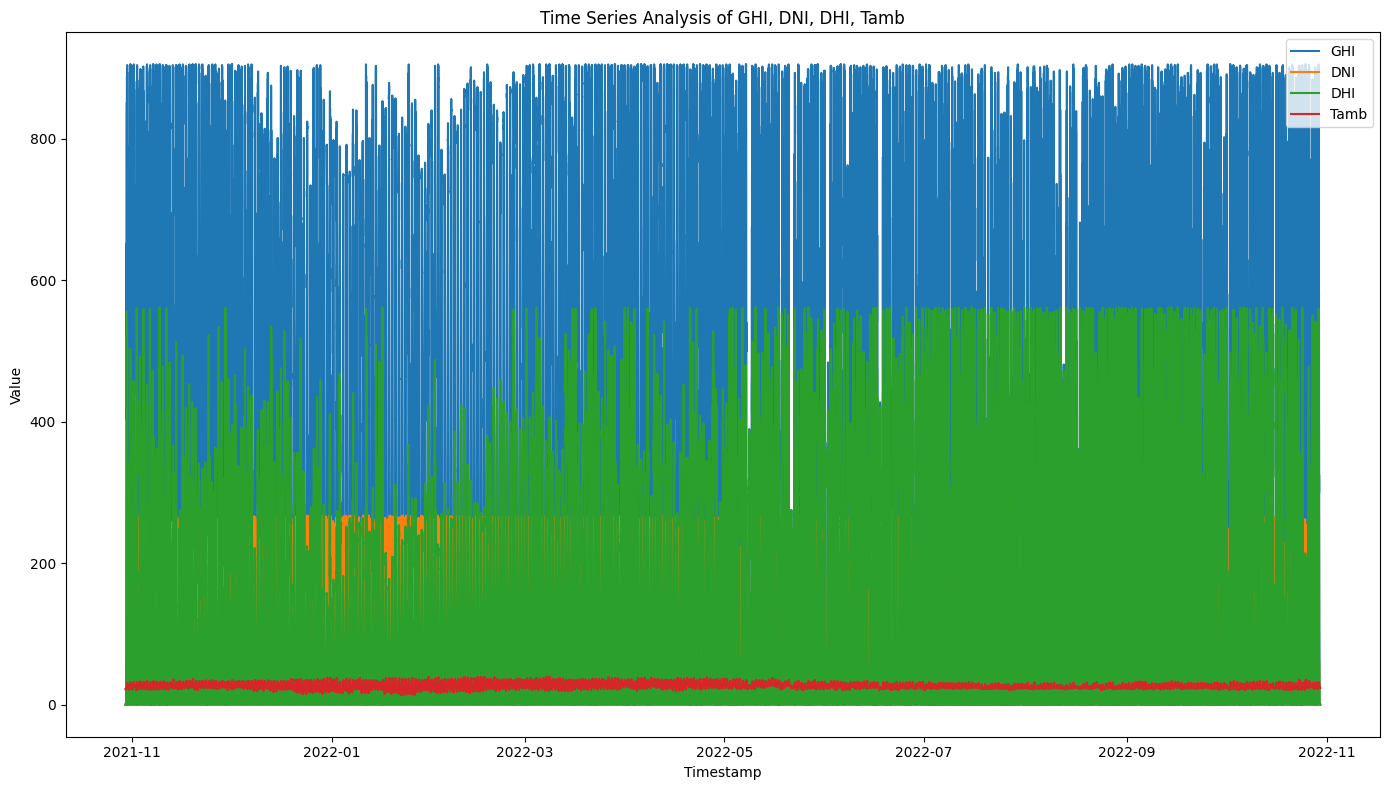

In [13]:
plot_time_series(cleaned_data)